In [49]:
#Bibliotecas utilizadas
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import numpy as np
from wordcloud import WordCloud
import nltk
import datetime as dt
from nltk import FreqDist
from nltk.tokenize import sent_tokenize
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
import re
%config InlineBackend.rc={'figure.figsize': (16, 14)}
%config InlineBackend.figure_format='retina'
import scipy.stats as stats

In [2]:
#Definição de funções
def RemoviStopWords(instancia):
    instancia = instancia.lower()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))
def Pre_Processing_data(frase):
    temp = frase
    temp = re.sub(r'[-./?!,":;()\'+*#&]',' ',temp)
    #temp = re.sub('[-|0-9]',' ', temp)
    temp = RemoviStopWords(temp)
    return (temp)

In [3]:
msgs = pd.read_csv("SMS_Senior.csv",encoding = "ISO-8859-1")
msgs.head()

,Full_Text,got,great,wat,free,text,txt,win,already,dun,...,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam
0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,12,2017-01-01 00:08:00,no
1,"came to look at the flat, seems ok, in his 50s...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,23,2017-01-01 00:19:00,no
2,Urgent! call 09061749602 from Landline. Your c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,25,2017-01-01 01:53:00,yes
3,Do you hide anythiing or keeping distance from me,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,2017-01-01 02:14:00,no
4,"Actually, my mobile is full of msg. And i m do...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,29,2017-01-01 02:25:00,no


In [4]:
d_time = pd.to_datetime(msgs["Date"])
#Coluna com o nome do dia da semana
d_week = d_time.dt.weekday_name
#Coluna com os meses contados em inteiros de 1 a 12
df_month = d_time.dt.month
count_msgs_month = Counter(df_month)


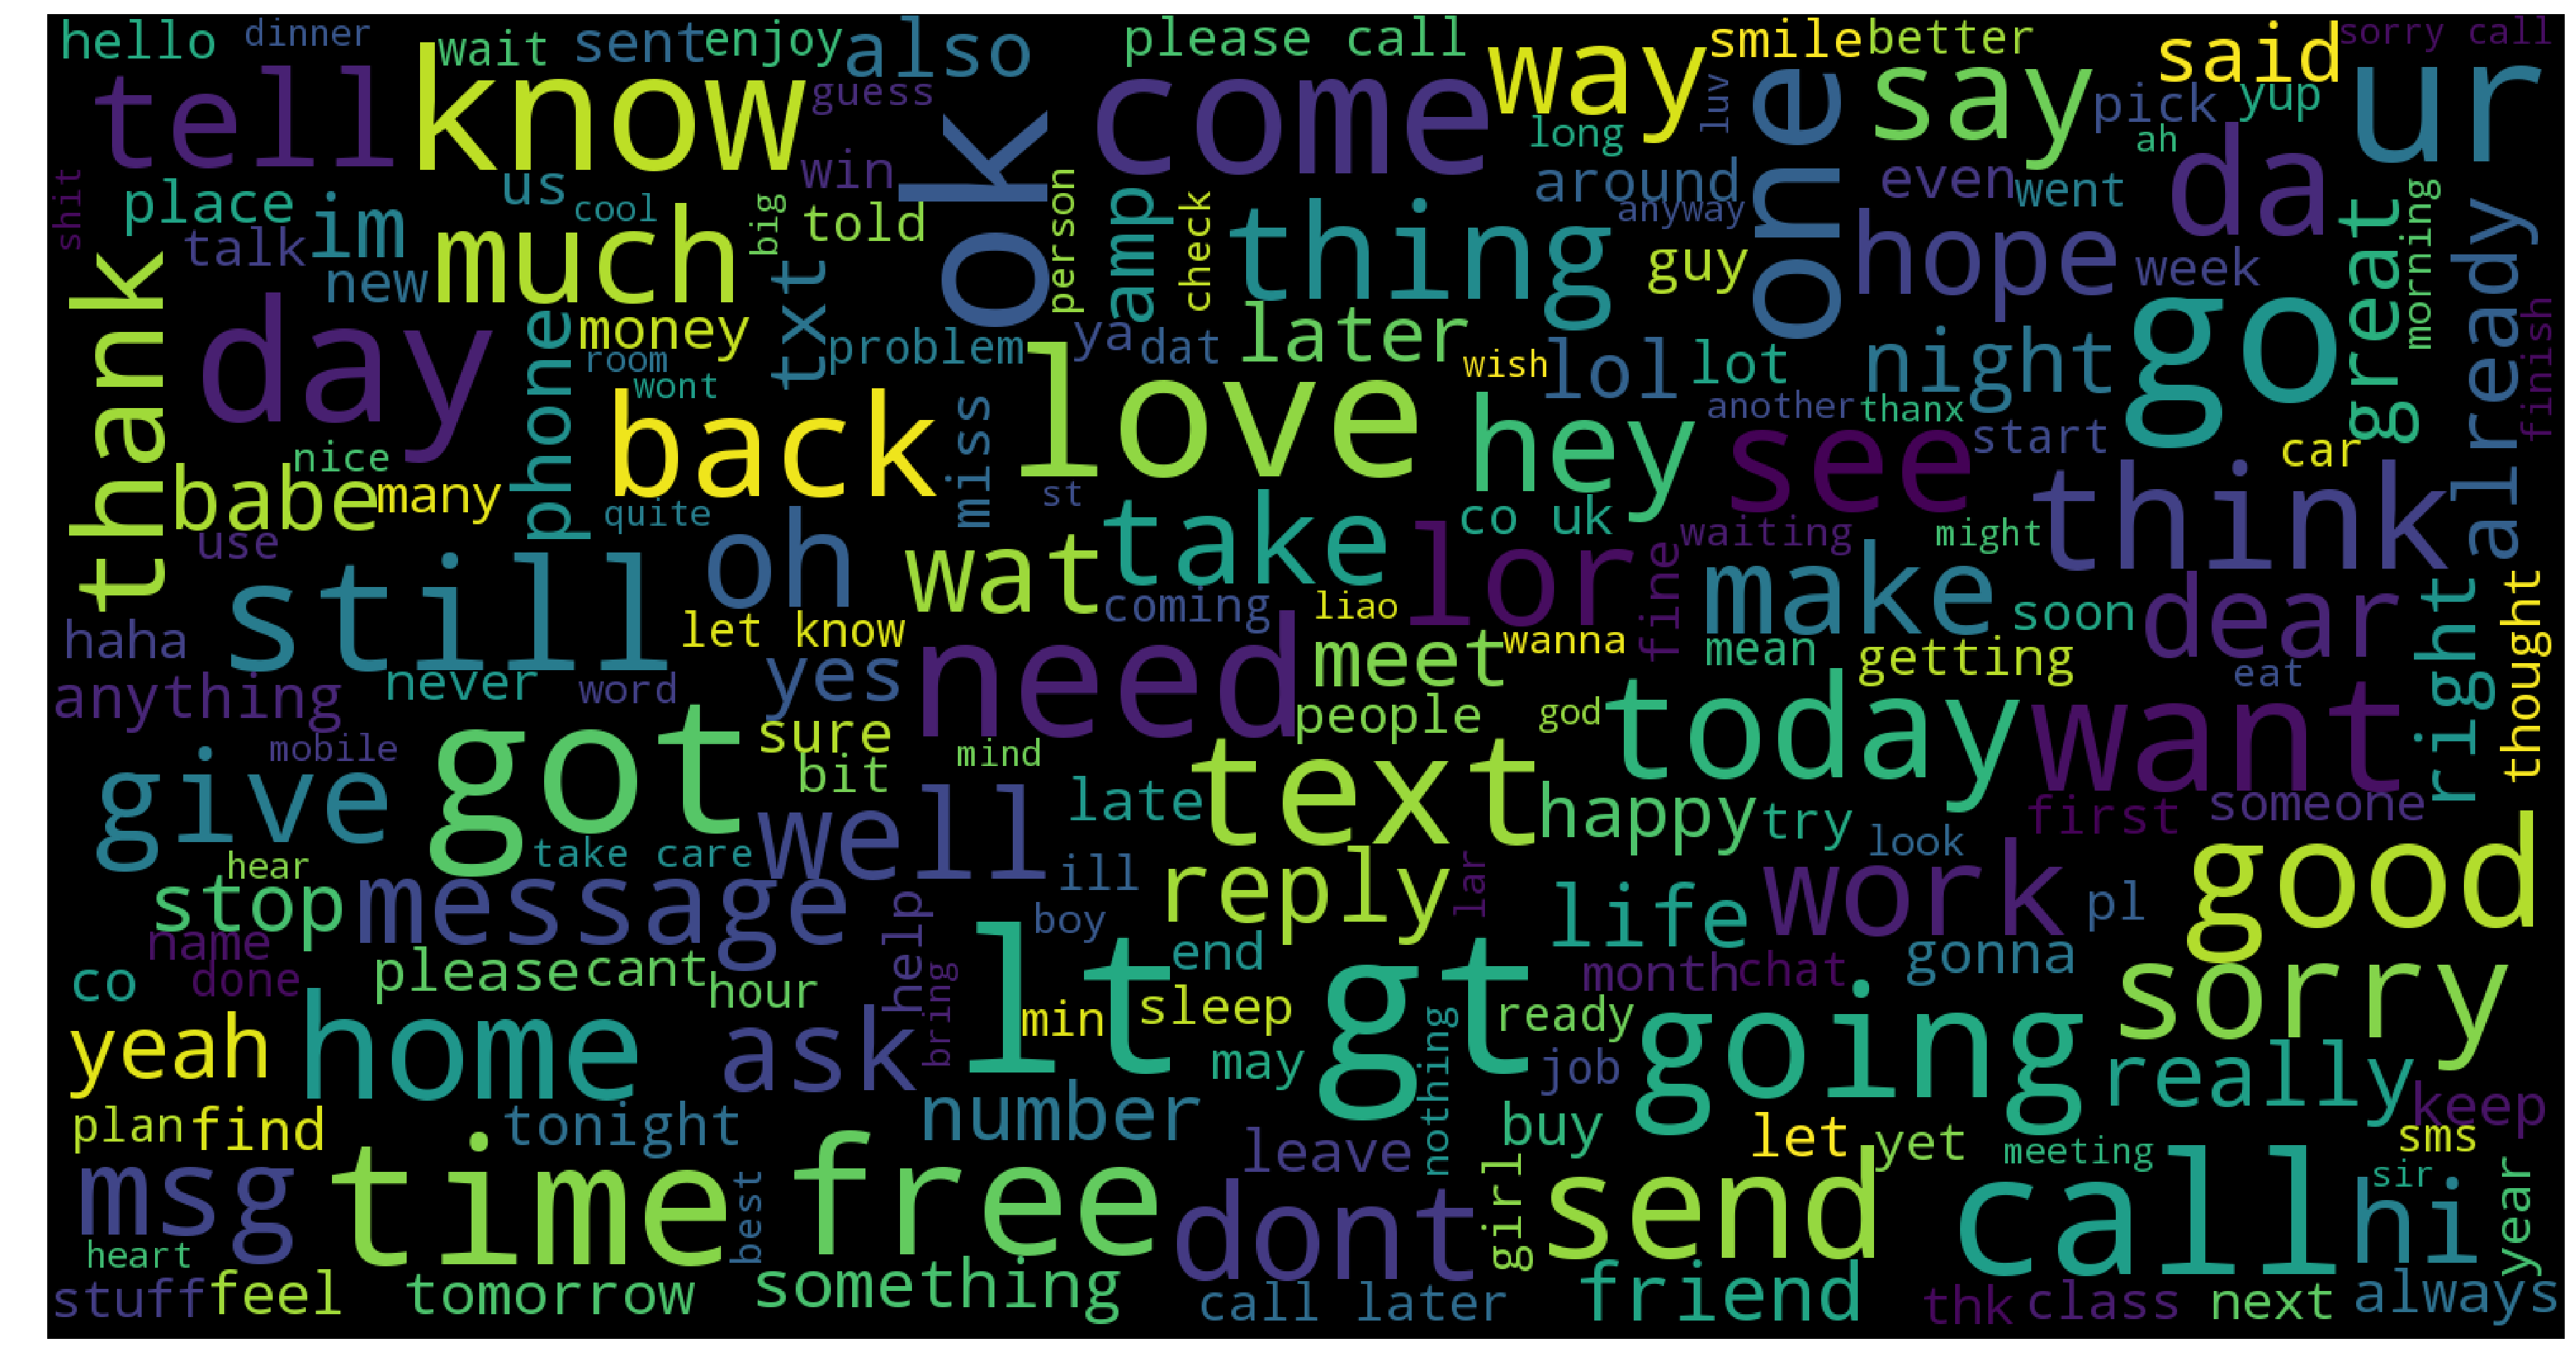

In [7]:
#Stop Words e Stemming
Full_Msgs = list(msgs["Full_Text"])
Full_Msgs = ' '.join(Full_Msgs)
Full_Msgs = re.sub(r'[-./?!,":;()\'+*#&£]',' ',Full_Msgs)
#nltk.download('popular')
Full_Msgs = re.sub('[-|0-9]',' ', Full_Msgs)
Full_Msgs = RemoviStopWords(Full_Msgs)
#Full_Msgs
wordcloud = WordCloud(max_font_size=120,width = 1520, height = 800).generate(Full_Msgs)
plt.figure(figsize=(32,18))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [8]:
col_Is_Spam = msgs["IsSpam"]

spam_msg_count_Jan = 0
com_msg_count_Jan = 0

spam_msg_count_Feb = 0
com_msg_count_Feb = 0

spam_msg_count_Mar = 0
com_msg_count_Mar = 0

testando = Counter(col_Is_Spam)
for ind in range(len(col_Is_Spam)):
    if df_month[ind] == 1:
        if col_Is_Spam[ind] == "yes":
            spam_msg_count_Jan = spam_msg_count_Jan + 1
        else:
            com_msg_count_Jan = com_msg_count_Jan + 1
    elif df_month[ind] == 2:
        if col_Is_Spam[ind] == "yes":
            spam_msg_count_Feb = spam_msg_count_Feb + 1
        else:
            com_msg_count_Feb = com_msg_count_Feb + 1
    elif df_month[ind] == 3:
        if col_Is_Spam[ind] == "yes":
            spam_msg_count_Mar = spam_msg_count_Mar + 1
        else:
            com_msg_count_Mar = com_msg_count_Mar + 1
print("A quantidade de mensagens comuns no mês de Janeiro foi: " ,com_msg_count_Jan)
print("A quantidade de Spams no mês de Janeiro foi: " ,spam_msg_count_Jan)
print("A quantidade de mensagens comuns no mês de Fevereiro foi: " ,com_msg_count_Feb)
print("A quantidade de Spams comuns no mês de Fevereiro foi: " ,spam_msg_count_Feb)
print("A quantidade de mensagens comuns no mês de Março foi: " ,com_msg_count_Mar)
print("A quantidade de Spams comuns no mês de Março foi: " ,spam_msg_count_Mar)

A quantidade de mensagens comuns no mês de Janeiro foi:  1687
A quantidade de Spams no mês de Janeiro foi:  266
A quantidade de mensagens comuns no mês de Fevereiro foi:  1512
A quantidade de Spams comuns no mês de Fevereiro foi:  244
A quantidade de mensagens comuns no mês de Março foi:  1628
A quantidade de Spams comuns no mês de Março foi:  237


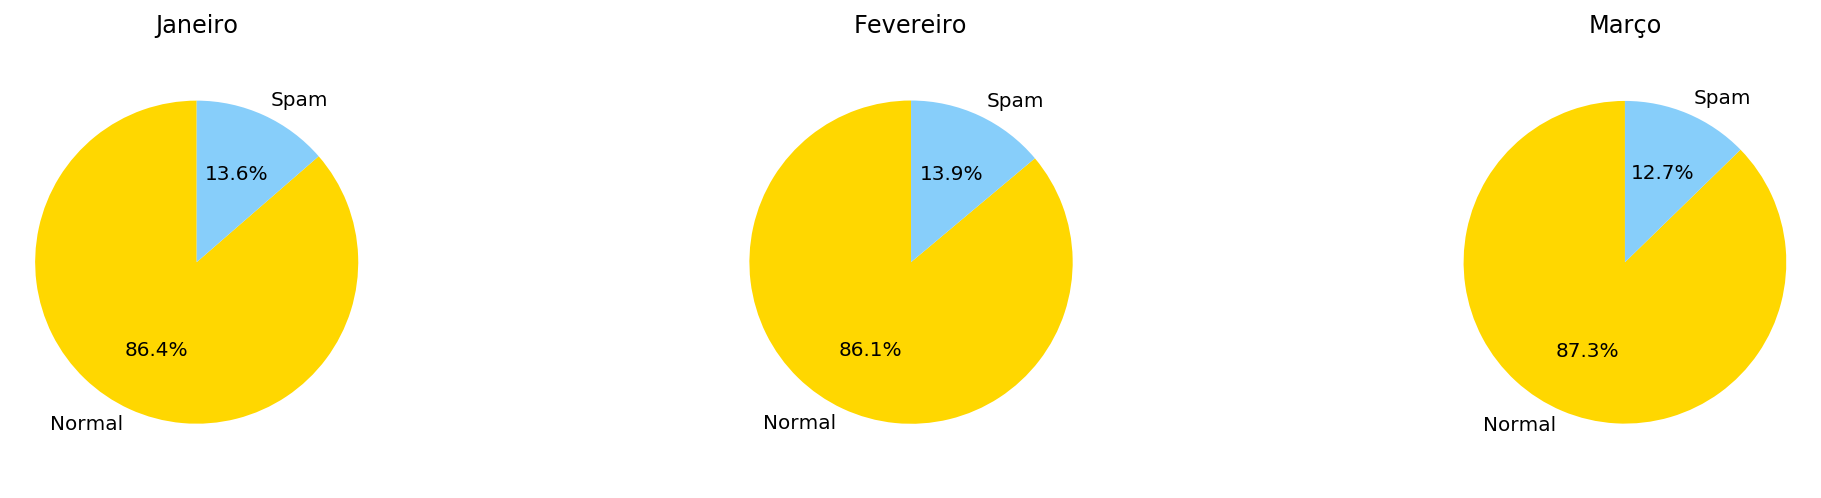

In [9]:
Janeiro = [com_msg_count_Jan,spam_msg_count_Jan]
Fevereiro = [com_msg_count_Feb,spam_msg_count_Feb]
Marco = [com_msg_count_Mar,spam_msg_count_Mar]

fig, eixos = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
# Cria o gráfico de pizza na primeira posição com as configurações definidas
pie_1 = eixos[0].pie(Janeiro, labels=['Normal','Spam'],
                    autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])
# Define o título deste gráfico
eixos[0].set_title('Janeiro')
# Deixa os dois eixos iguais, fazendo com que o gráfico mantenha-se redondo
eixos[0].axis('equal')
# Idem a acima, para o segundo gráfico de pizza
pie_2 = eixos[1].pie(Fevereiro, labels=['Normal','Spam'], 
                    autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])
eixos[1].set_title('Fevereiro')
eixos[1].axis('equal')

pie_3 = eixos[2].pie(Marco, labels=['Normal','Spam'], 
                    autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])
eixos[2].set_title('Março')
plt.axis('equal')
# Ajusta o espaço entre os dois gráficos
plt.subplots_adjust(wspace=1)
plt.show()

In [10]:
word_count = msgs["Word_Count"]
n_jan = []
n_feb = []
n_mar = []
n_jan_not = []
n_feb_not = []
n_mar_not = []

for ind in range(len(col_Is_Spam)):
    if df_month[ind] == 1:
        n_jan.append(word_count[ind])
        n_jan_not.append(word_count[ind])
    elif df_month[ind] == 2:
        n_feb.append(word_count[ind])
        n_feb_not.append(word_count[ind])
    elif df_month[ind] == 3:
        n_mar.append(word_count[ind])
        n_mar_not.append(word_count[ind])

n_jan.sort()
n_feb.sort()
n_mar.sort()

n_jan = pd.DataFrame(n_jan)

n_feb = pd.DataFrame(n_feb)

n_mar = pd.DataFrame(n_mar)


#Calcular o máximo, o mínimo, a média, a mediana, o desvio
#padrão e a variância da quantidade total de palavras
#(Word_Count) para cada mês;
print ("A quantidade máxima de palavras em uma mensagem no mês de Janeiro foi de ",int(round(n_jan.max()))," Palavras")
print ("A quantidade mínima de palavras em uma mensagem no mês de Janeiro foi de ",int(round(n_jan.min()))," Palavras")
print ("A média de palavras em uma mensagem no mês de Janeiro foi de aproximadamente ",int(round(n_jan.mean()))," Palavras")
print ("A mediana de palavras em uma mensagem no mês de Janeiro foi de aproximadamente: ",int(round(n_jan.median()))," Palavras")
print ("O desvio padrão de palavras no mês de Janeiro foi de aproximadamente: ",int(round(n_jan.std())))
print ("A variância no mês de Janeiro foi de aproximadamente: ",int(round(n_jan.var())))
print("")
print ("A quantidade máxima de palavras em uma mensagem no mês de Fevereiro foi de ",int(round(n_feb.max()))," Palavras")
print ("A quantidade mínima de palavras em uma mensagem no mês de Fevereiro foi de ",int(round(n_feb.min()))," Palavras")
print ("A média de palavras em uma mensagem no mês de Fevereiro foi de aproximadamente ",int(round(n_feb.mean()))," Palavras")
print ("A mediana de palavras em uma mensagem no mês de Fevereiro foi de aproximadamente: ",int(round(n_feb.median()))," Palavras")
print ("O desvio padrão de palavras no mês de Fevereiro foi de aproximadamente: ",int(round(n_feb.std())))
print ("A variância no mês de Fevereiro foi de aproximadamente: ",int(round(n_feb.var())))
print("")
print ("A quantidade máxima de palavras em uma mensagem no mês de Março foi de ",int(round(n_mar.max()))," Palavras")
print ("A quantidade mínima de palavras em uma mensagem no mês de Março foi de ",int(round(n_mar.min()))," Palavras")
print ("A média de palavras em uma mensagem no mês de Março foi de aproximadamente ",int(round(n_mar.mean()))," Palavras")
print ("A mediana de palavras em uma mensagem no mês de Março foi de aproximadamente: ",int(round(n_mar.median()))," Palavras")
print ("O desvio padrão no mês de Março foi de aproximadamente: ",int(round(n_mar.std())))
print ("A variância no mês de Março foi de aproximadamente: ",int(round(n_mar.var())))
print("")



A quantidade máxima de palavras em uma mensagem no mês de Janeiro foi de  190  Palavras
A quantidade mínima de palavras em uma mensagem no mês de Janeiro foi de  2  Palavras
A média de palavras em uma mensagem no mês de Janeiro foi de aproximadamente  16  Palavras
A mediana de palavras em uma mensagem no mês de Janeiro foi de aproximadamente:  13  Palavras
O desvio padrão de palavras no mês de Janeiro foi de aproximadamente:  13
A variância no mês de Janeiro foi de aproximadamente:  158

A quantidade máxima de palavras em uma mensagem no mês de Fevereiro foi de  100  Palavras
A quantidade mínima de palavras em uma mensagem no mês de Fevereiro foi de  2  Palavras
A média de palavras em uma mensagem no mês de Fevereiro foi de aproximadamente  16  Palavras
A mediana de palavras em uma mensagem no mês de Fevereiro foi de aproximadamente:  13  Palavras
O desvio padrão de palavras no mês de Fevereiro foi de aproximadamente:  11
A variância no mês de Fevereiro foi de aproximadamente:  122

A 

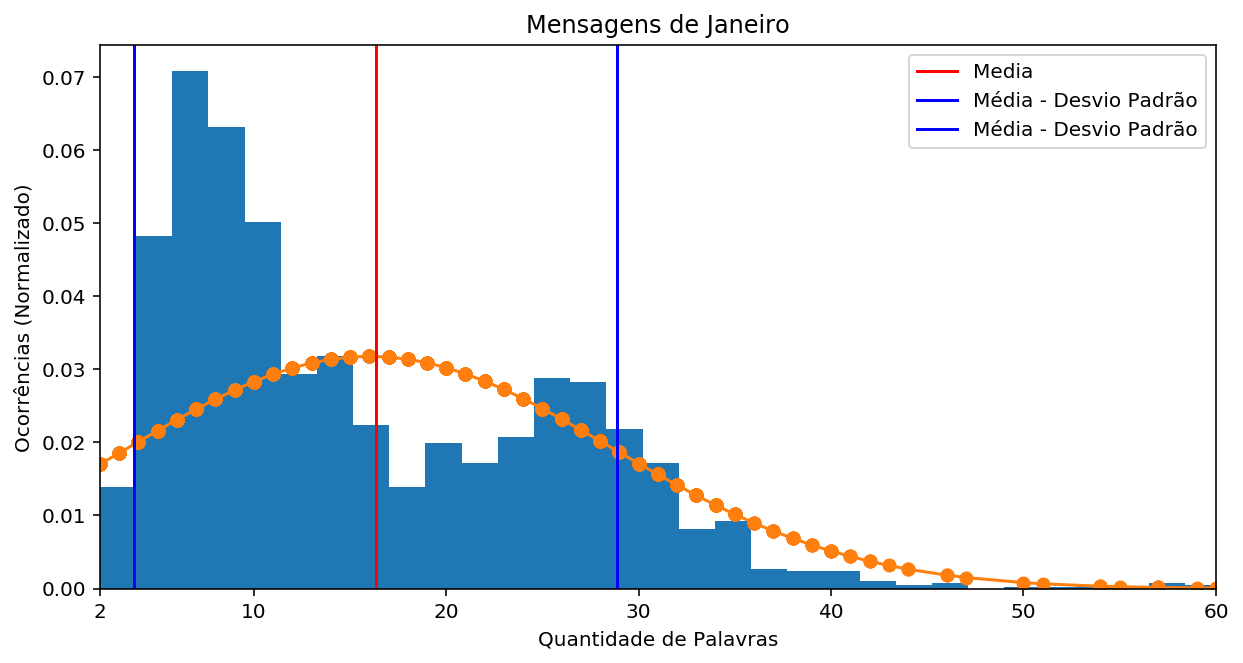

In [11]:
plt.figure(figsize=(10,5))
plt.hist(n_jan, bins = 100, normed=1)
fit = stats.norm.pdf(n_jan, n_feb.mean(), n_jan.std())  #this is a fitting indeed
plt.plot(n_jan,fit,'-o')
plt.axvline(x=float(n_jan.mean()), color='r', linestyle='-',label = 'Media')
plt.axvline(x=float(n_jan.mean()+n_jan.std()), color='b', linestyle='-',label = 'Média - Desvio Padrão')
plt.axvline(x=float(n_jan.mean()-n_jan.std()), color='b', linestyle='-',label = 'Média - Desvio Padrão')
plt.xlim(xmin = 2)
plt.xlim(xmax = 60)
plt.xticks([2,10,20,30,40,50,60])
plt.legend()
plt.title("Mensagens de Janeiro")
plt.xlabel("Quantidade de Palavras")
plt.ylabel("Ocorrências (Normalizado)")
plt.show()


In [12]:
freq = Counter(n_mar_not)

ocorrencias = []
q_words = []
m=[]
[m.extend([k,v]) for k,v in freq.items()]
value_crimes = []
keys_crimes = []
for ind in range(len(m)):
    if ind % 2 == 0:
        q_words.append(m[ind])
    else:
        ocorrencias.append(m[ind])


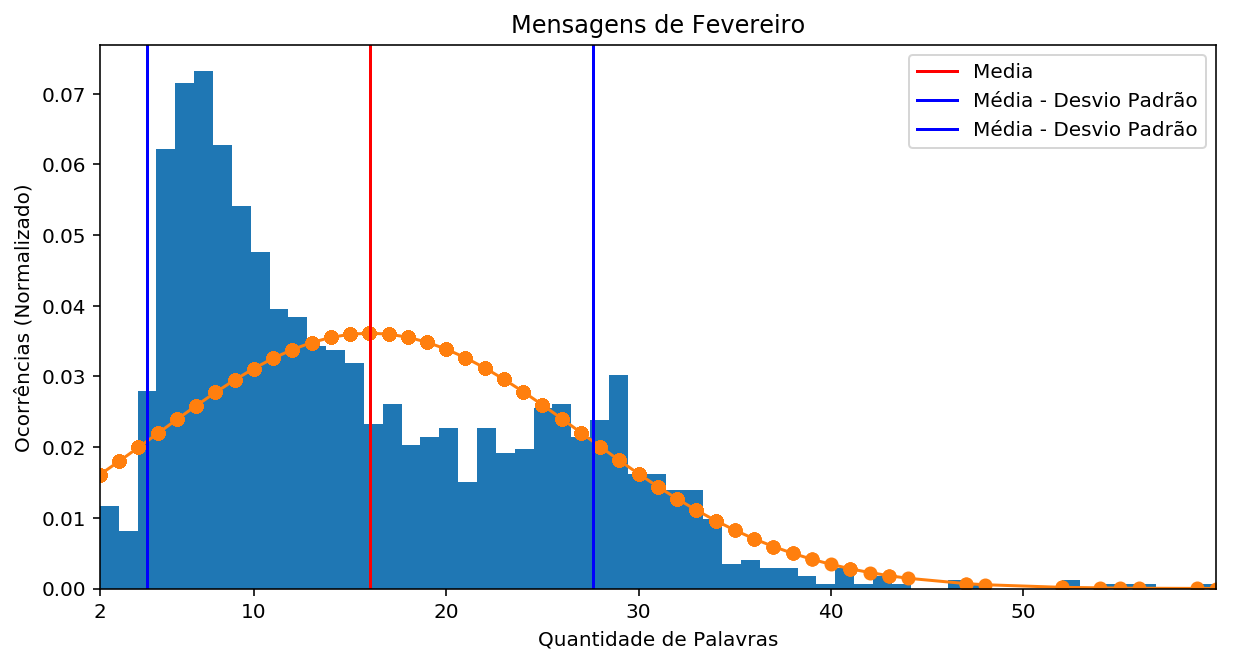

In [13]:
plt.figure(figsize=(10,5))
plt.hist(n_feb, bins = 100, normed=1)
fit = stats.norm.pdf(n_feb, n_feb.mean(), n_feb.std())  #this is a fitting indeed
plt.plot(n_feb,fit,'-o')
plt.axvline(x=float(n_feb.mean()), color='r', linestyle='-',label = 'Media')
plt.axvline(x=float(n_feb.mean()+n_mar.std()), color='b', linestyle='-',label = 'Média - Desvio Padrão')
plt.axvline(x=float(n_feb.mean()-n_mar.std()), color='b', linestyle='-',label = 'Média - Desvio Padrão')
plt.xlim(xmin = 2)
plt.xlim(xmax = 60)
plt.xticks([2,10,20,30,40,50])
plt.legend()
plt.title("Mensagens de Fevereiro")
plt.xlabel("Quantidade de Palavras")
plt.ylabel("Ocorrências (Normalizado)")
plt.show()

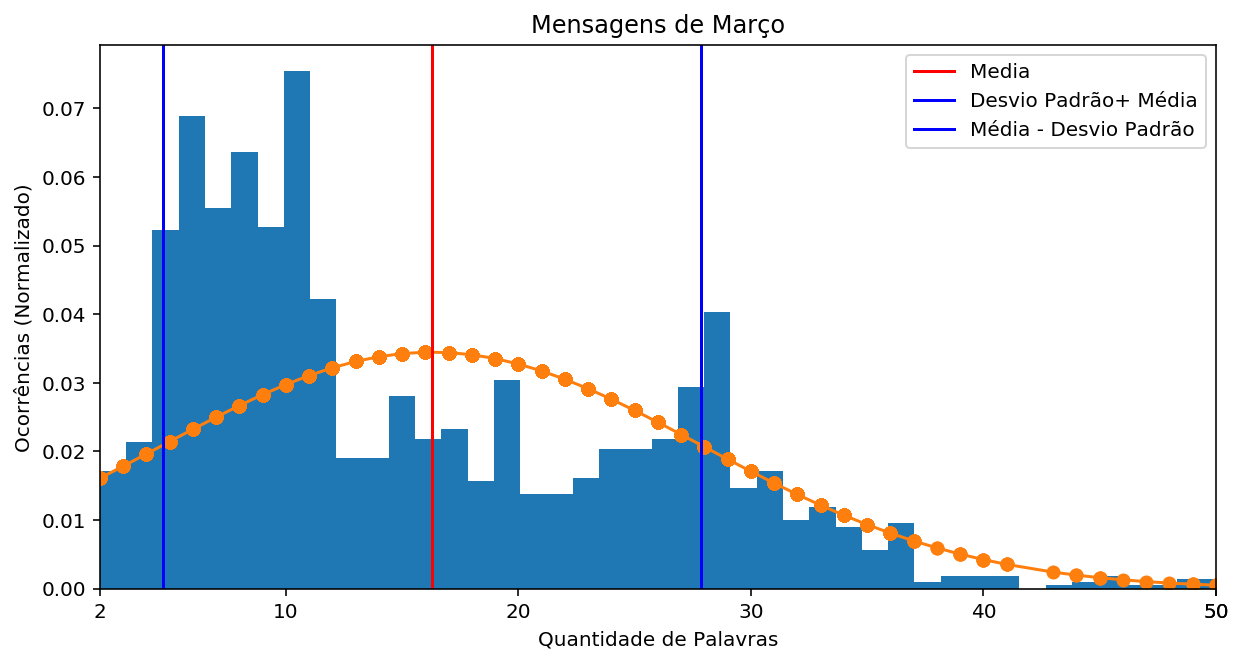

In [14]:
plt.figure(figsize=(10,5))
plt.hist(n_mar, bins = 100, normed=1)
fit = stats.norm.pdf(n_mar, n_mar.mean(), n_mar.std())
plt.plot(n_mar,fit,'-o')
plt.axvline(x=float(n_mar.mean()), color='r', linestyle='-',label = 'Media')
plt.axvline(x=float(n_mar.mean()+n_mar.std()), color='b', linestyle='-',label = 'Desvio Padrão+ Média')
plt.axvline(x=float(n_mar.mean()-n_mar.std()), color='b', linestyle='-',label = 'Média - Desvio Padrão')
plt.xlim(xmin = 2)
plt.xlim(xmax = 50)
plt.xticks([2,10,20,30,40,50,50])
plt.legend()
plt.title("Mensagens de Março")
plt.xlabel("Quantidade de Palavras")
plt.ylabel("Ocorrências (Normalizado)")
plt.show()

In [15]:
Com_msgs = msgs[msgs.IsSpam != 'yes']
spam_msgs = msgs[msgs.IsSpam != 'no']
Com_msgs = Com_msgs.reset_index(drop=True)
spam_msgs = spam_msgs.reset_index(drop=True)

d_com_msgs = pd.to_datetime(Com_msgs["Date"])
df_month_com = d_com_msgs.dt.month
d_com_msgs = list(d_com_msgs)
date = []
#d_com_msgs
for ind in range(len(d_com_msgs)):
    temp_string = str(d_com_msgs[ind])
    temp_string = temp_string.split()
    for i in range(len(temp_string)):
        if i == 0:
            date.append(temp_string[i])
            break
#date_f = pd.DataFrame(date)
#date_f
#Counter(date)
#print (pd.DataFrame(df_month_com))
C_Jan = []
C_Feb = []
C_Mar = []
for ind in range(len(d_com_msgs)):
    if df_month_com[ind] == 1 :
        C_Jan.append(date[ind])
    elif df_month_com[ind] == 2 :
        C_Feb.append(date[ind])
    elif df_month_com[ind] == 3:
        C_Mar.append(date[ind])
        

com_jan = Counter(C_Jan).most_common(1)
com_feb = Counter(C_Feb).most_common(1)
com_mar = Counter(C_Mar).most_common(1) #d_time.dt.weekday_name
print("O dia que mais foi recebido mensagens comuns no mês de Janeiro foi: ",com_jan[0][0]," com ",com_jan[0][1]," ocorrências")
print("O dia que mais foi recebido mensagens comuns no mês de Fevereiro foi: ",com_feb[0][0]," com ",com_feb[0][1]," ocorrências")
print("O dia que mais foi recebido mensagens comuns no mês de Março foi: ",com_mar[0][0]," com ",com_mar[0][1]," ocorrências")
#Com_msgs
Count_Jan = Counter(C_Jan)
Count_Feb = Counter(C_Feb)
Count_Mar = Counter(C_Mar)
#Count_Jan


O dia que mais foi recebido mensagens comuns no mês de Janeiro foi:  2017-01-01  com  69  ocorrências
O dia que mais foi recebido mensagens comuns no mês de Fevereiro foi:  2017-02-13  com  72  ocorrências
O dia que mais foi recebido mensagens comuns no mês de Março foi:  2017-03-08  com  69  ocorrências


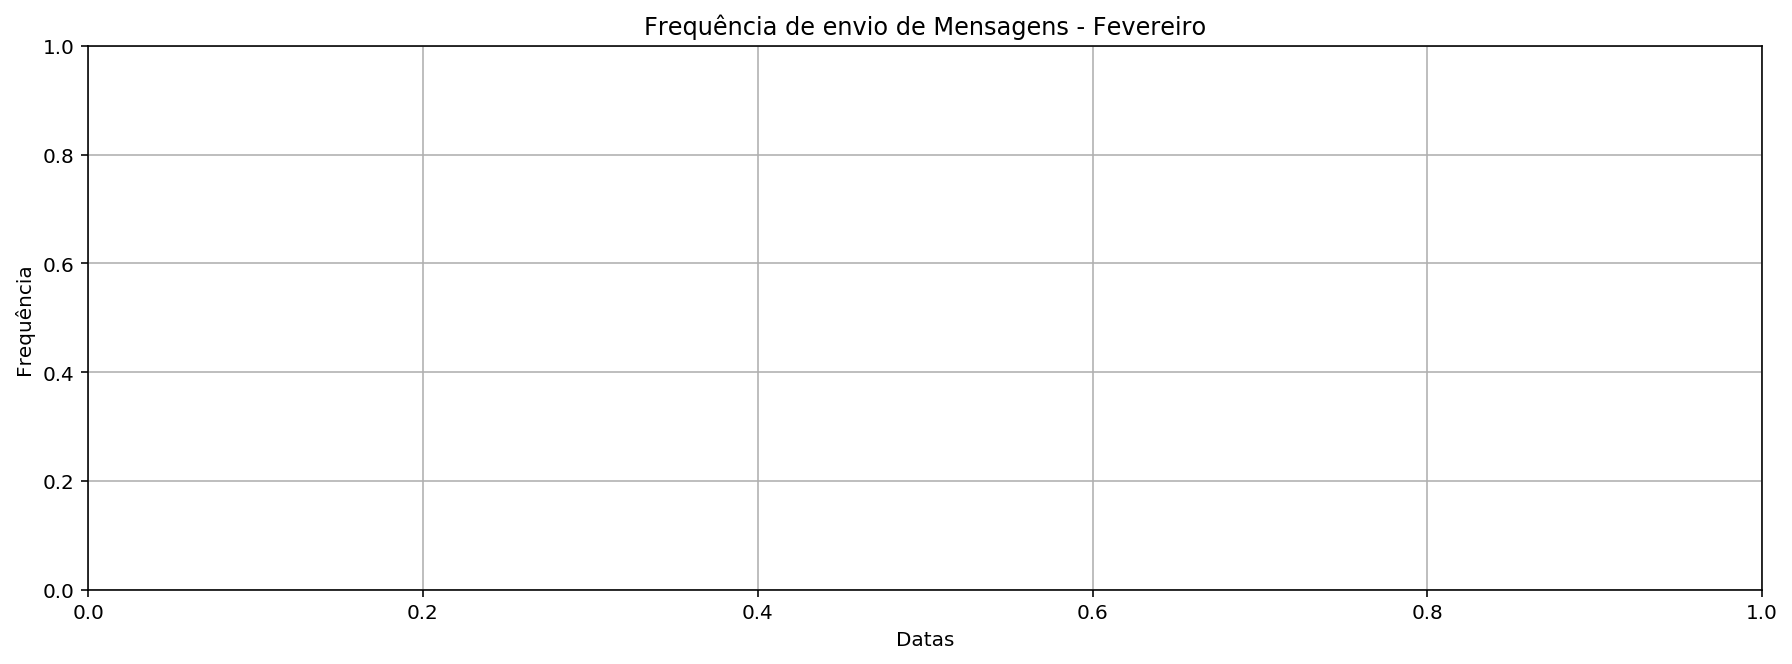

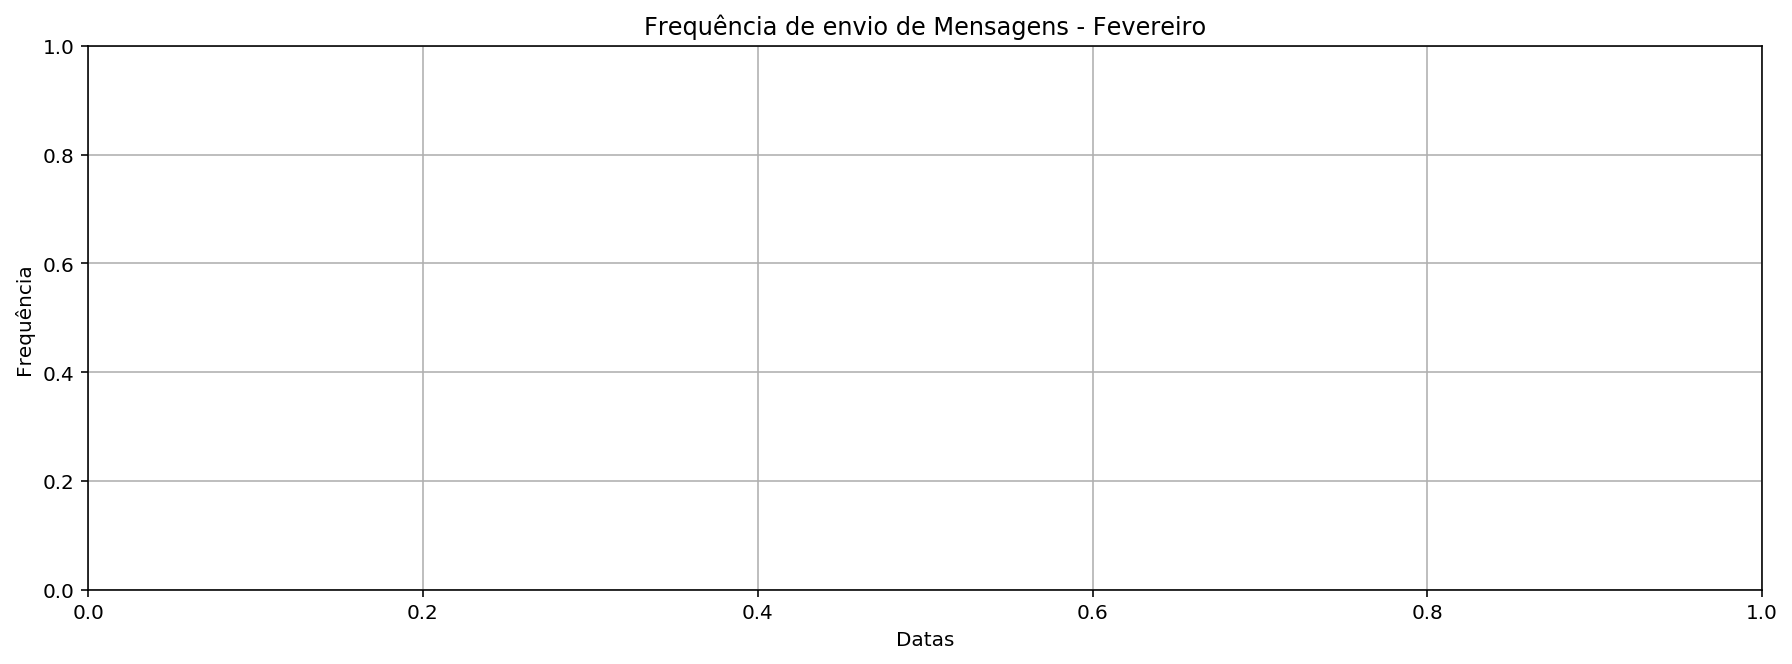

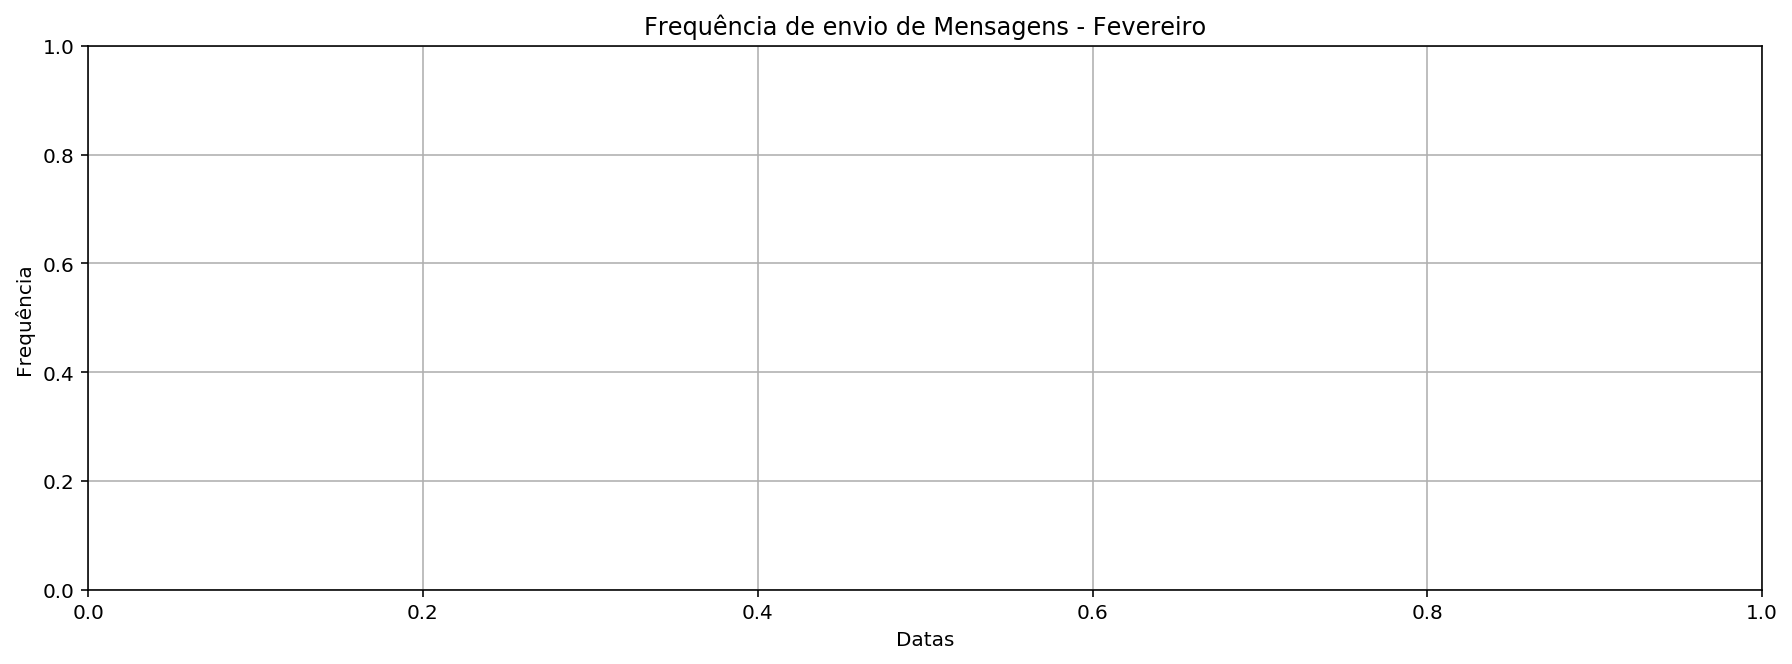

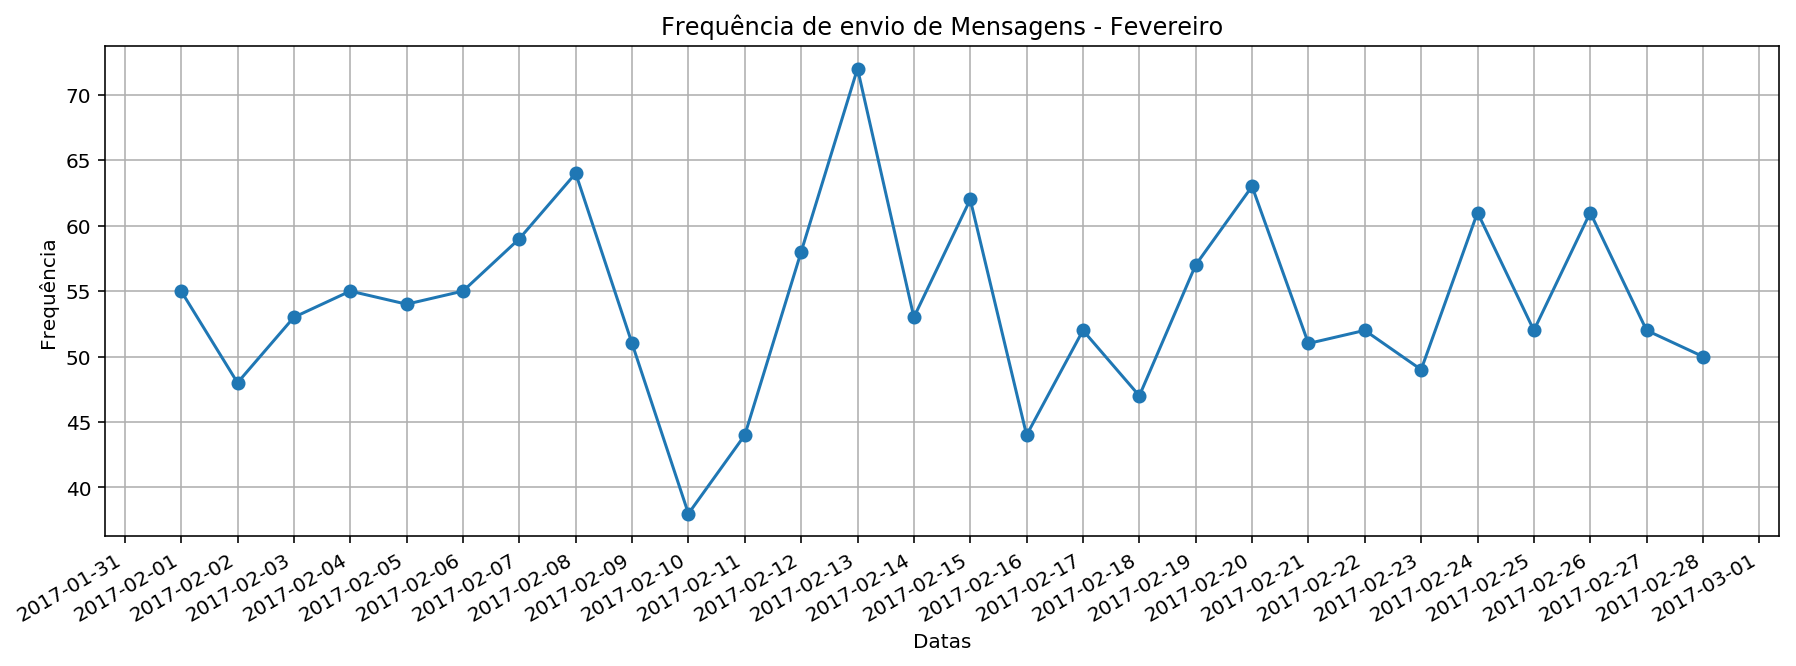

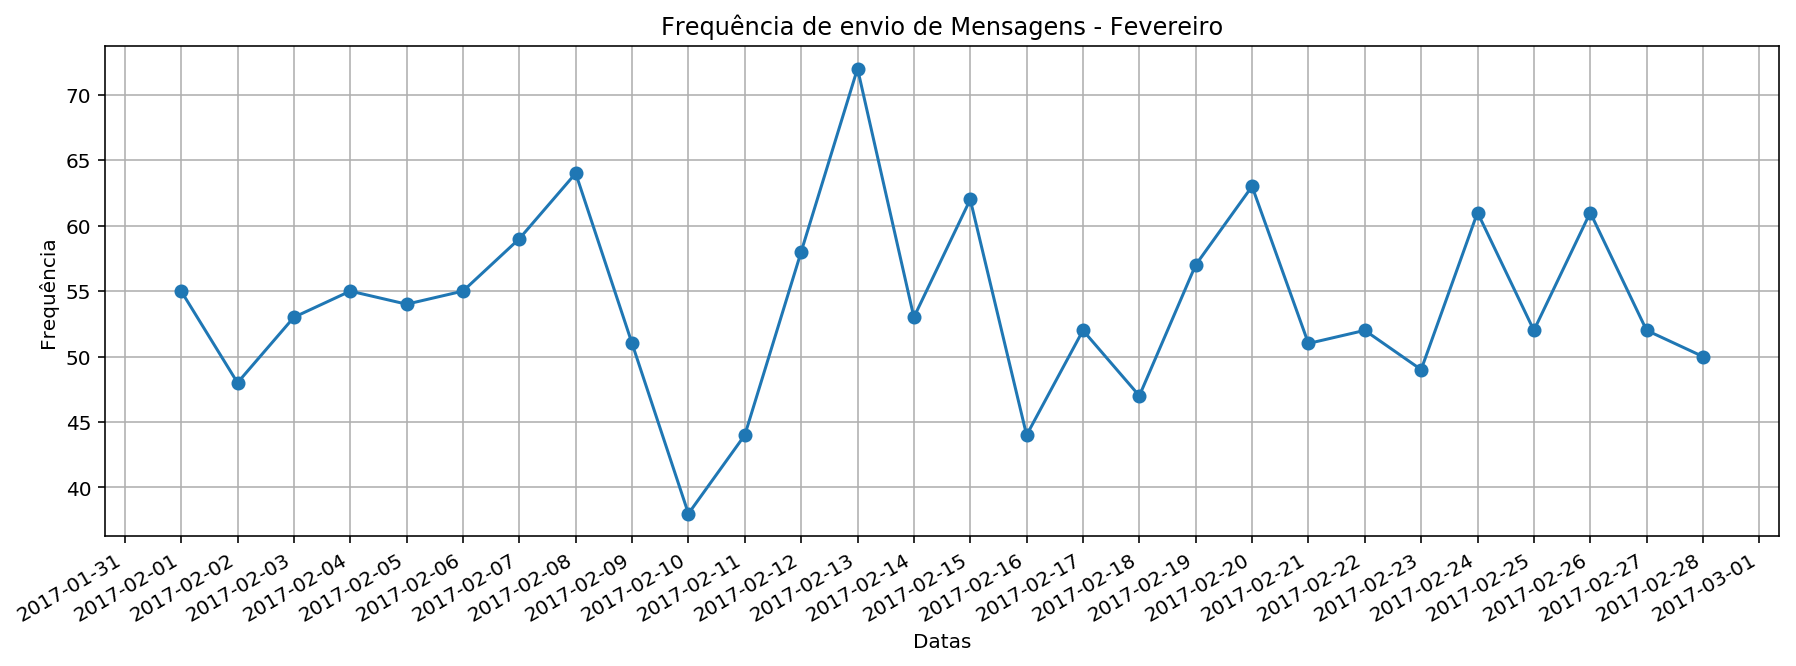

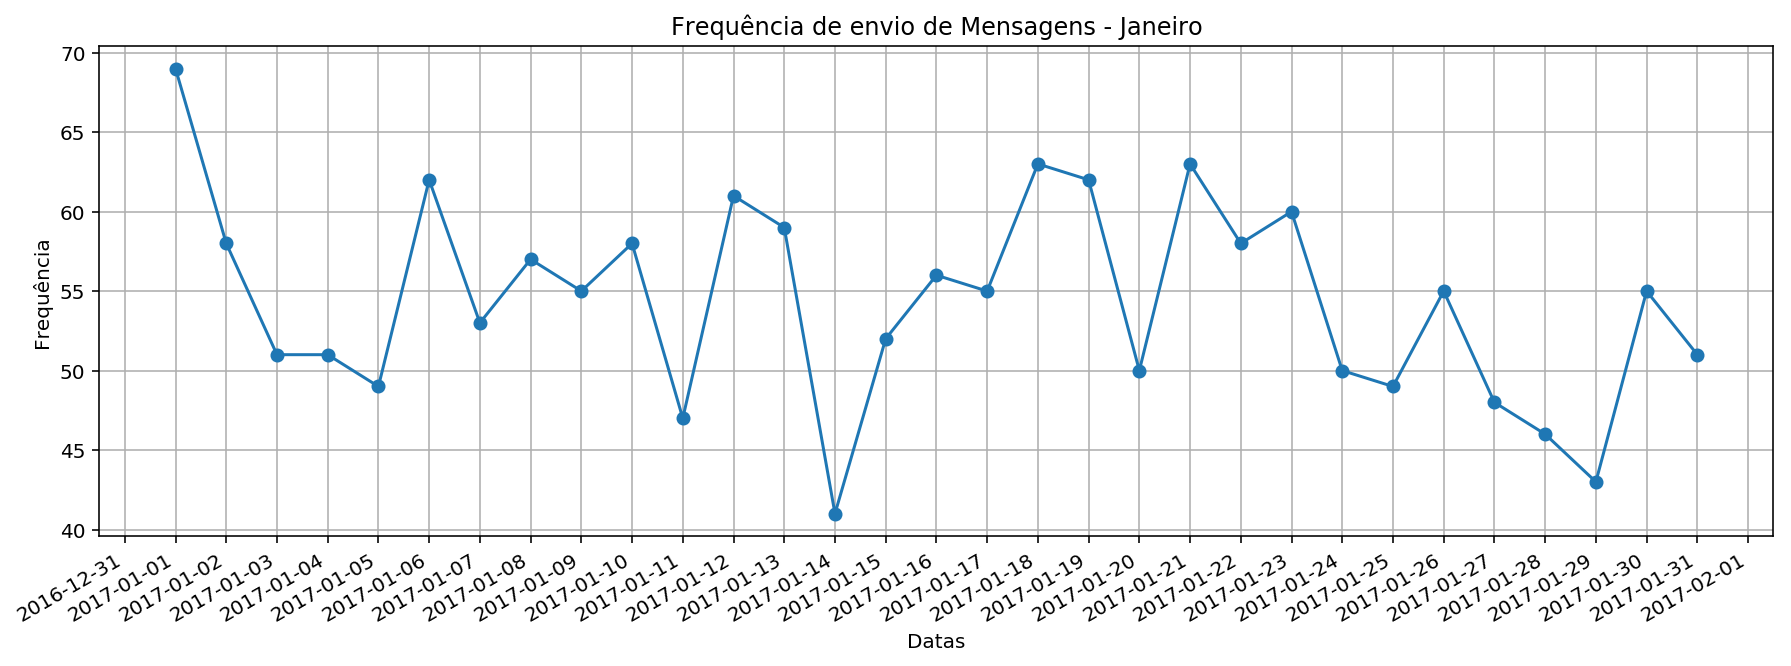

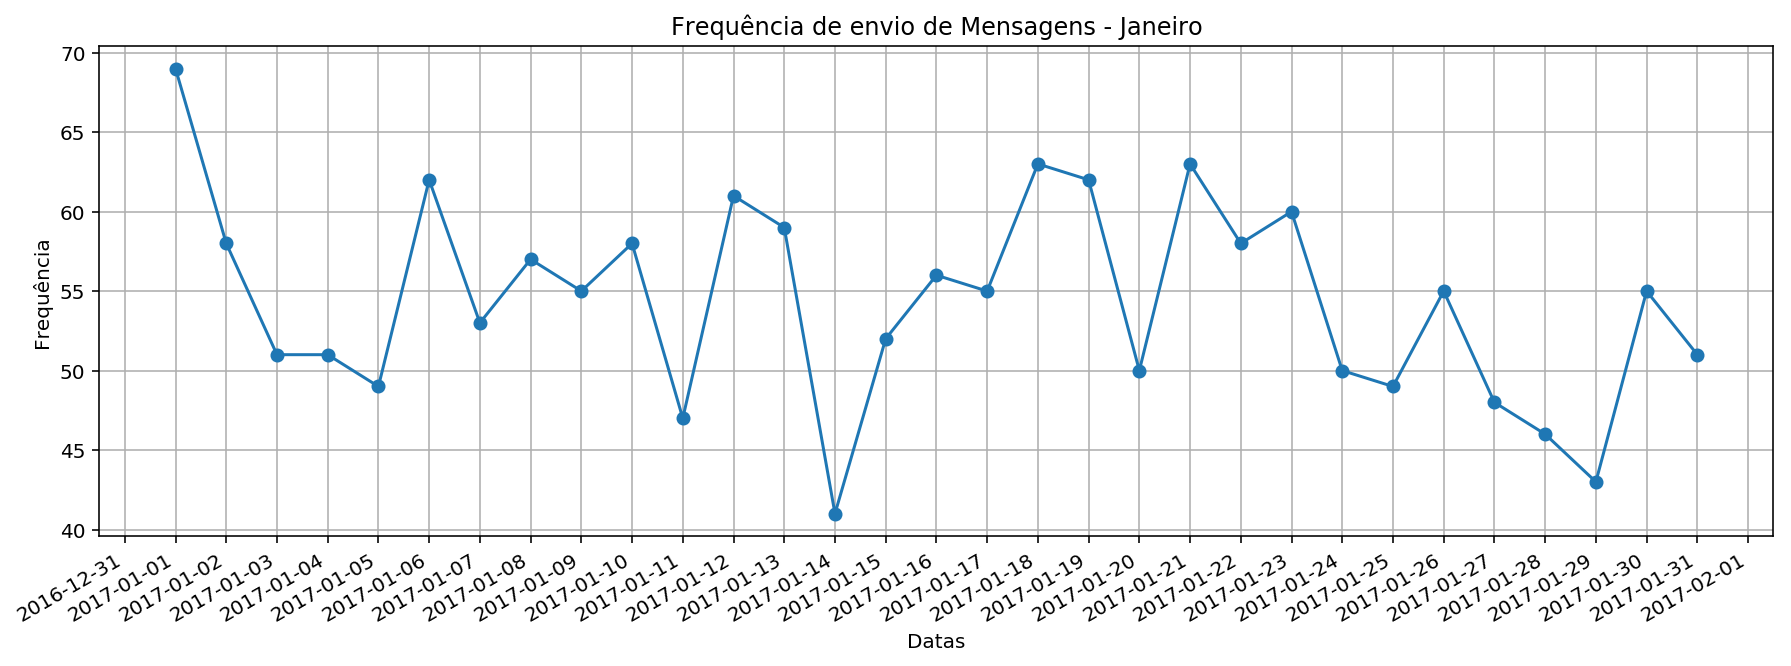

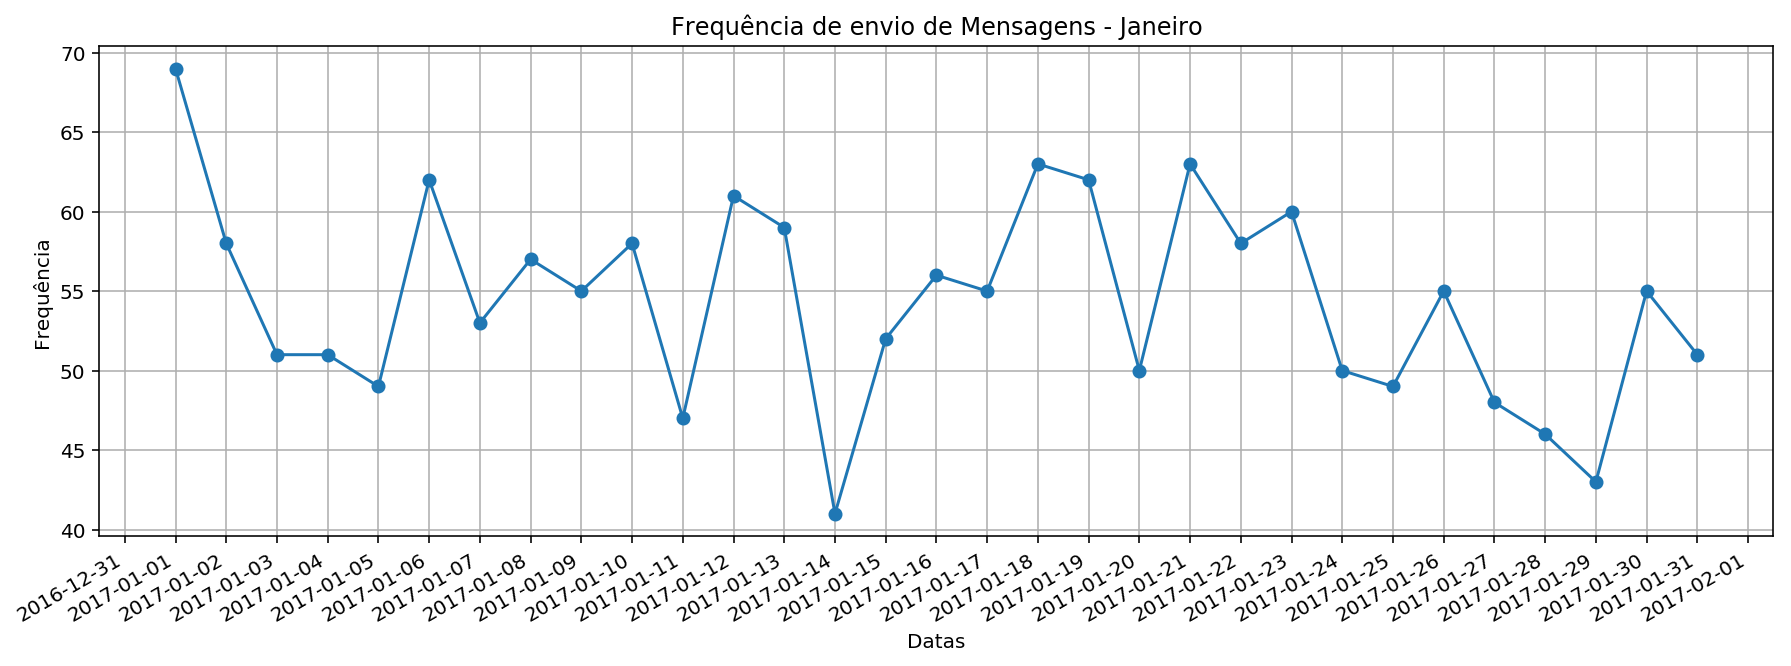

In [29]:
freq = Counter(C_Jan)
ocorrencias = []
q_words = []
m=[]
[m.extend([k,v]) for k,v in freq.items()]
for ind in range(len(m)):
    if ind % 2 == 0:
        q_words.append(m[ind])
    else:
        ocorrencias.append(m[ind])
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in q_words]
y = ocorrencias
plt.figure(figsize=[15,5])
plt.grid()
plt.title("Frequência de envio de Mensagens - Janeiro")
plt.xlabel("Datas")
plt.ylabel("Frequência")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x,y,linestyle='-',marker='o')
plt.gcf().autofmt_xdate()
plt.show()

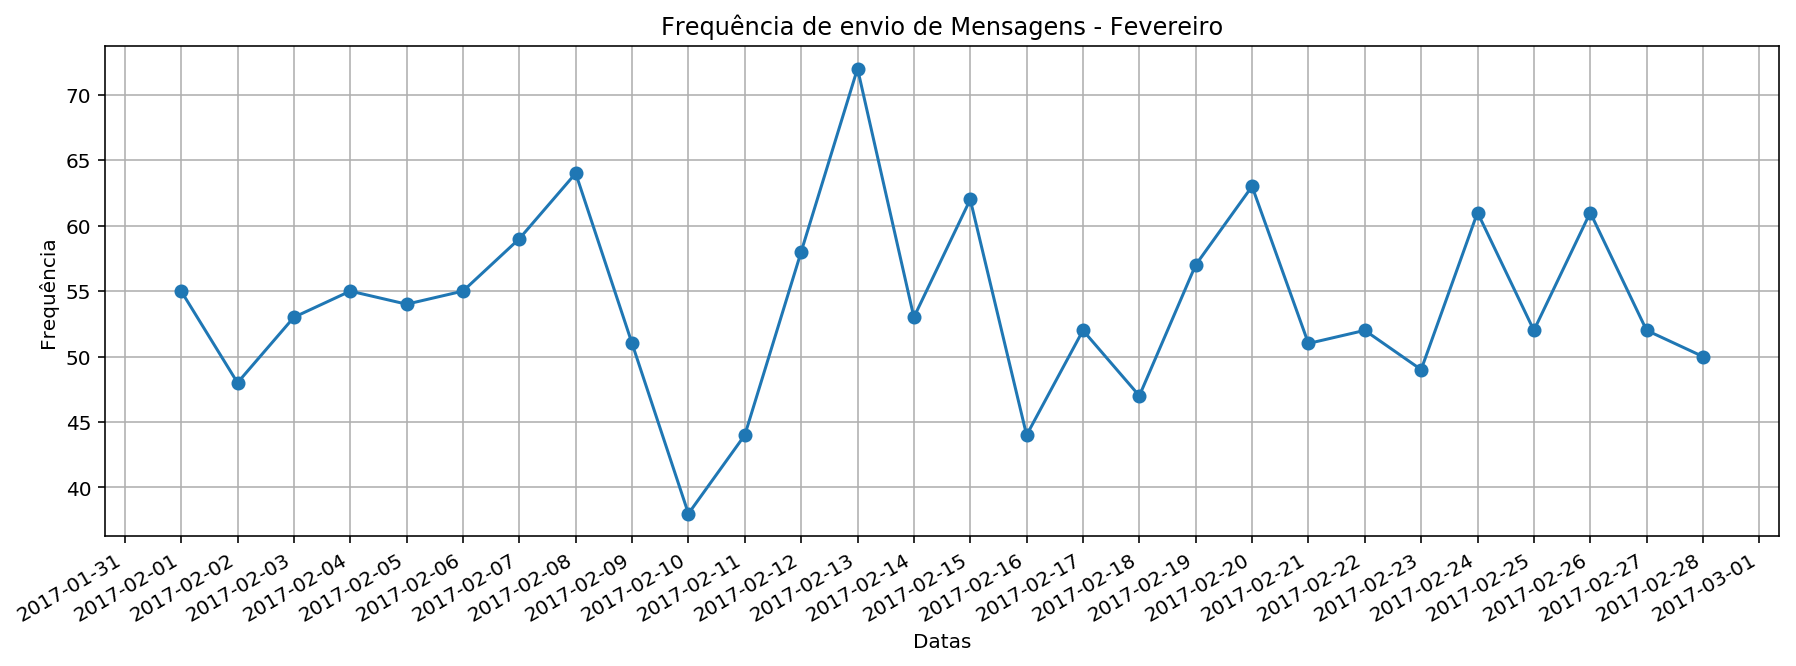

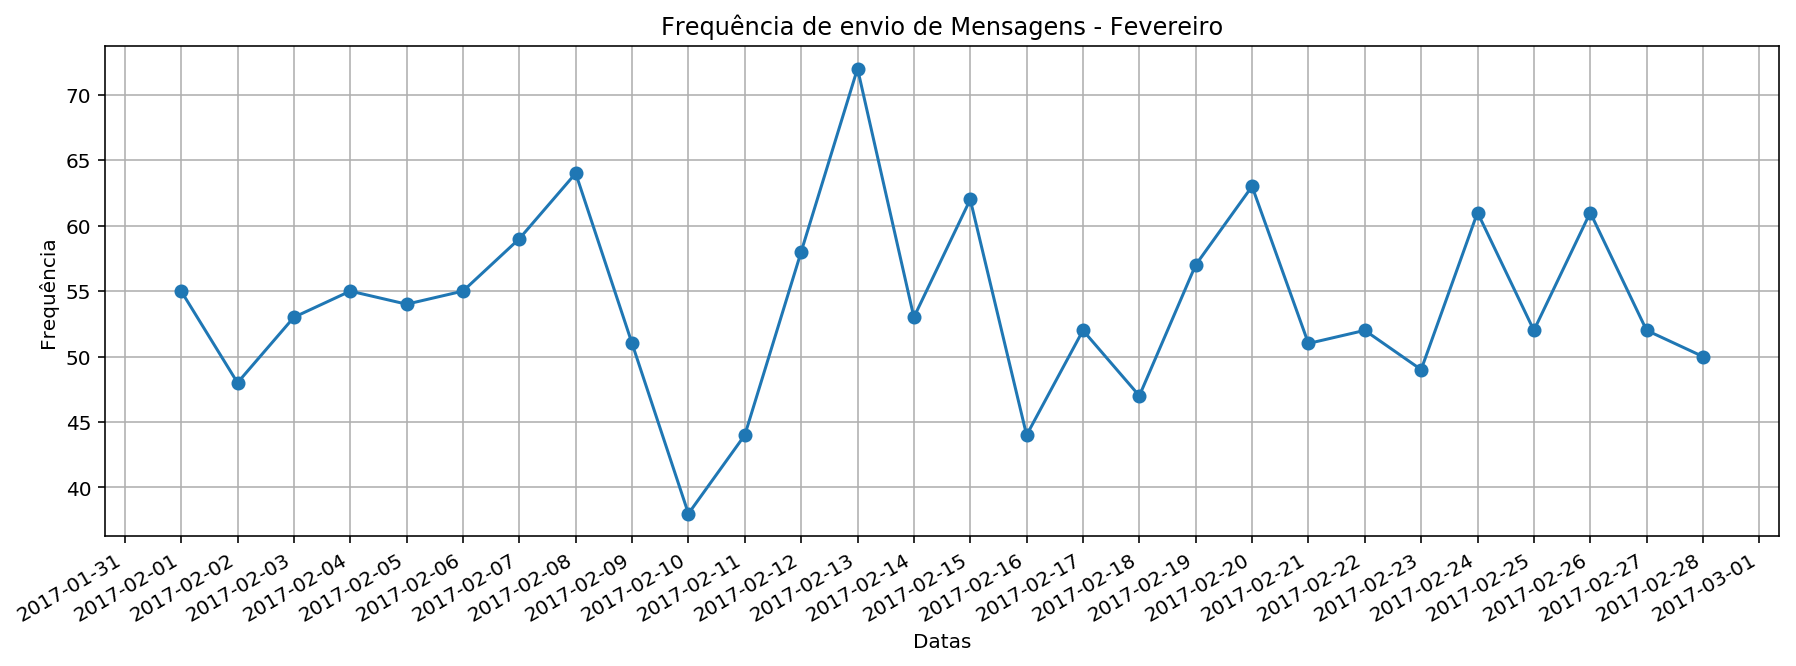

In [31]:
#import time 
#from dateutil.parser import parse
#import matplotlib.dates as mdates
freq = Counter(C_Feb)
ocorrencias = []
q_words = []
m=[]
[m.extend([k,v]) for k,v in freq.items()]
for ind in range(len(m)):
    if ind % 2 == 0:
        q_words.append(m[ind])
    else:
        ocorrencias.append(m[ind])
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in q_words]
y = ocorrencias
plt.figure(figsize=[15,5])
plt.grid()
plt.title("Frequência de envio de Mensagens - Fevereiro")
plt.xlabel("Datas")
plt.ylabel("Frequência")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x,y,linestyle='-',marker='o')
plt.gcf().autofmt_xdate()
plt.show()

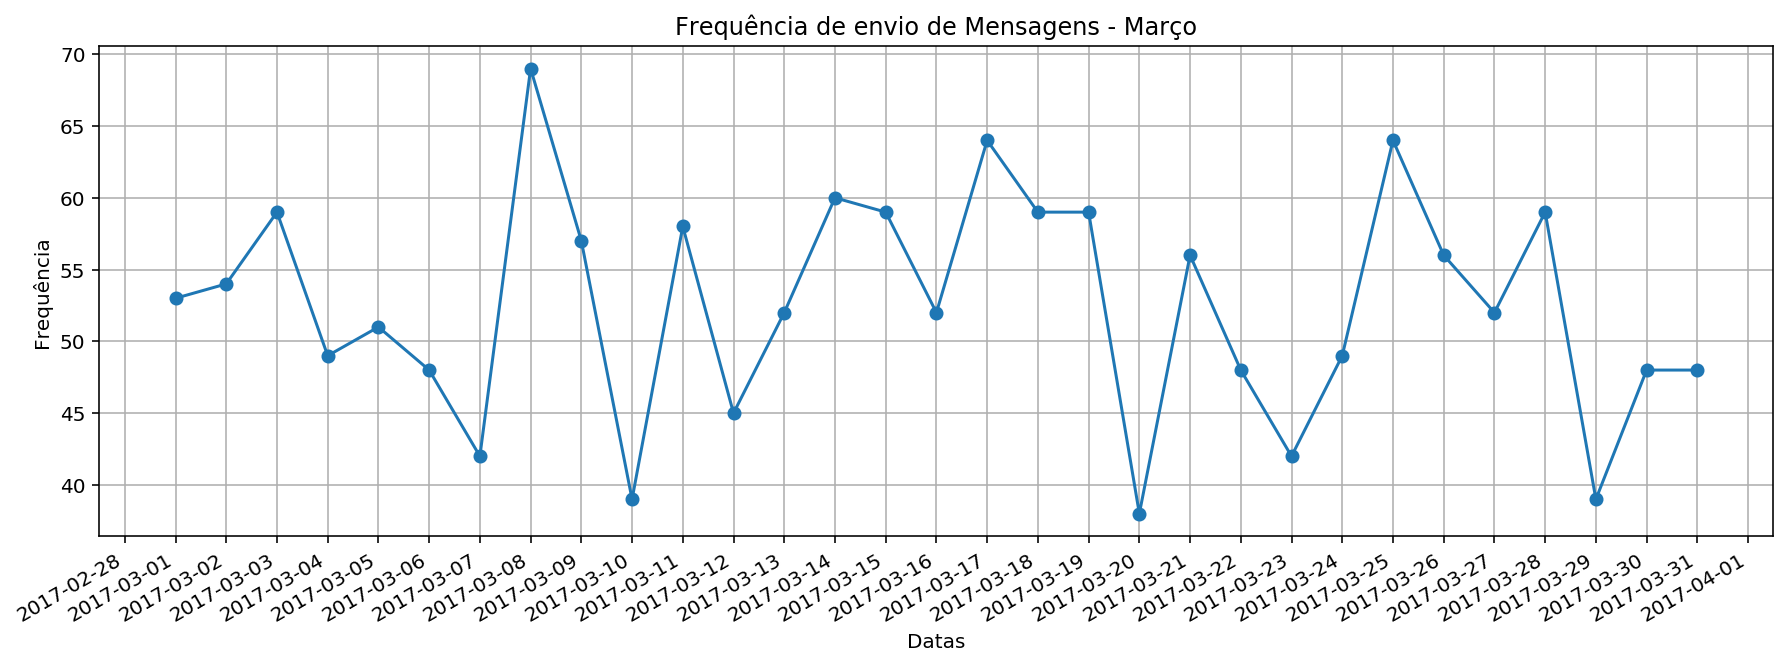

In [32]:
freq = Counter(C_Mar)
ocorrencias = []
q_words = []
m=[]
[m.extend([k,v]) for k,v in freq.items()]
for ind in range(len(m)):
    if ind % 2 == 0:
        q_words.append(m[ind])
    else:
        ocorrencias.append(m[ind])
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in q_words]
y = ocorrencias
plt.figure(figsize=[15,5])
plt.grid()
plt.title("Frequência de envio de Mensagens - Março")
plt.xlabel("Datas")
plt.ylabel("Frequência")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x,y,linestyle='-',marker='o')
plt.gcf().autofmt_xdate()
plt.show()

In [33]:
msgs = pd.read_csv("SMS_Senior.csv",encoding = "ISO-8859-1")
mensagens_text = list(msgs['Full_Text'])
mensagens_isspam = msgs['IsSpam'] 
mensagens_filtradas = []
for ind in range(len(mensagens_text)):
    temp = mensagens_text[ind] 
    temp = Pre_Processing_data(temp)
    mensagens_filtradas.append(temp)
#mensagens_filtradas
print("Finish")

Finish


In [34]:
lista = zip(mensagens_filtradas,mensagens_isspam)
lista_n = list(lista)
train = lista_n[1:4500]
test = lista_n[4501:5400]

In [35]:
#Treinamento
cl = NaiveBayesClassifier(train)
print("Finish")

Finish


In [50]:
frases = msgs['Full_Text']
frases = list(frases[4501:5000])
#pd.DataFrame(frases).head()

In [ ]:
type(frases[1])
fr = Pre_Processing_data("Hello darling, i need to talk to you")
#cl.classify("Hello darling, i need to talk to you")

In [40]:
is_spam_test = []
is_spam_test.append
for ind in range(len(frases)):
    str_temp = frases[ind]
    str_temp = Pre_Processing_data(str_temp)
    is_spam_test.append(cl.classify(str_temp))
    print (str_temp)
print ("Finish")

even cant close eyes vava playing umma
shuhui bought ron present swatch watch
hey babe friend cancel still visit
yes place town meet exciting adult singles uk txt chat 86688 150p msg
wanna gym harri
hey whats plan sat
got another job one hospital data analysis something starts monday sure thesis got finished
wanna watch movie
call get chance plz lt 3
much better thanks lol
making dinner
alright make sure car back tonight
sorry cant take call right happens r 2waxsto wat want come ill get medical insurance able deliver basic care currently shopping right medical insurance give til friday morning thats see major person guide right insurance
sorry call later
asked 3mobile 0870 chatlines inclu free mins india cust servs sed yes l8er got mega bill 3 dont giv shit bailiff due days £250 3 want £800
tension ah machi problem
easy mate guess quick drink bit ambitious
pls dont play others life
askd u question hours answer
yes glad made
ever notice driving anyone going slower idiot everyone driving

free top ringtone sub weekly ringtone get 1st week free send subpoly 81618 3 per week stop sms 08718727870
hello peach cake tasts lush
hi dude hw r u da realy mising u today
ladies first genus second k
yeah able text ready meet
dunno dat wat told ok lor
hi hope u get txt~journey hasnt gd 50 mins late think
goodmorning grandfather expired leave today
trying weekend v
see requirements please
awww dat sweet think something nice time tonight ill probably txt u later cos im lonely xxx
eh sorry leh din c ur msg sad already lar watching tv u still office
want go
know god created gap fingers one made comes amp fills gaps holding hand love
expect whenever text hope goes well tomo
mobile customer may claim free camera phone upgrade pay go sim card loyalty call 0845 021 3680 offer ends 28thfeb c apply
people mu table lambda
pls go today lt gt dont want excuses
yeah open chat click friend lists make list easy pie
aldrine rakhesh ex rtm pls call urgent
done mean
news hassling get weed week andres m

In [ ]:
tempa = []
testado = mensagens_isspam[4501:5000]
for ind in range(len(mensagens_isspam)):
    if ind>4500:
        tempa.append(mensagens_isspam[ind])
comparars = pd.DataFrame(frases)
comparars['is_spam_teste'] = pd.DataFrame(is_spam_test)
comparars['Classificado pelo base de dados'] = pd.DataFrame(tempa)
comparars.columns = ['Mensagem','Classificado pelo algoritmo','Classificado pela base de dados']
comparars[15:30]